In [652]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [621]:
df = pd.read_csv("./citrus.csv")

In [622]:
print(len(df))
df.head()

10000


,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [623]:
df = df.sample(frac=1)
df

,name,diameter,weight,red,green,blue
7509,grapefruit,11.45,197.52,142,65,15
6802,grapefruit,11.02,190.51,161,80,16
3983,orange,9.51,168.65,171,70,18
3056,orange,8.82,157.87,164,81,12
6241,grapefruit,10.66,184.27,156,65,18
...,...,...,...,...,...,...
8801,grapefruit,12.37,210.82,134,64,18
8476,grapefruit,12.11,207.17,135,65,8
5093,grapefruit,9.03,156.92,152,68,15
7025,grapefruit,11.16,192.68,151,68,27


In [624]:
y = df['name']
y.head()

7509    grapefruit
6802    grapefruit
3983        orange
3056        orange
6241    grapefruit
Name: name, dtype: object

In [625]:
df.columns

Index(['name', 'diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

In [626]:
X = df[['diameter', 'weight', 'red', 'green', 'blue']]
X

,diameter,weight,red,green,blue
7509,11.45,197.52,142,65,15
6802,11.02,190.51,161,80,16
3983,9.51,168.65,171,70,18
3056,8.82,157.87,164,81,12
6241,10.66,184.27,156,65,18
...,...,...,...,...,...
8801,12.37,210.82,134,64,18
8476,12.11,207.17,135,65,8
5093,9.03,156.92,152,68,15
7025,11.16,192.68,151,68,27


In [627]:
print(X.shape)
print(y.shape)

(10000, 5)
(10000,)


In [628]:
# 테스트 데이터 분리 (dataframe 슬라이싱 기능 이용)

idx = int(len(X) * 0.8)
print(idx)

8000


In [629]:
X_train = X.iloc[:idx]
X_test = X.iloc[idx:]

print(X_train.shape, X_test.shape)

(8000, 5) (2000, 5)


In [630]:
y_train = y.iloc[:idx]
y_test = y.iloc[idx:]

print(y_train.shape, y_test.shape)

(8000,) (2000,)


In [631]:
x_idx = ['diameter', 'weight', 'red', 'green', 'blue']
u_list = []
std_list = []

for idx in x_idx:
    # 평균이 0, 표준편차가 1인 정규분포
    u = X_train[idx].mean()
    std = X_train[idx].std()

    u_list.append(u)
    std_list.append(std)

    # u, std는 가지고있어야함 !! (test data, real input이 들어왔을때 이걸로 정규화 해야함)
    X_train[idx] = (X_train[idx] - u) / std

C:\Users\2023-PC(T)-8\AppData\Local\Temp\ipykernel_4604\3084147775.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[idx] = (X_train[idx] - u) / std


In [632]:
print(u_list)
print(std_list)
X_train.head()

[9.97244125, 175.00659875, 153.93875, 76.00775, 11.370125]
[1.9476167754942082, 29.203038917709403, 10.521196955939615, 11.741163562557363, 9.083223304674085]


,diameter,weight,red,green,blue
7509,0.758650,0.770927,-1.134733,-0.937535,0.399624
6802,0.537867,0.530883,0.671145,0.340022,0.509717
3983,-0.237440,-0.217669,1.621607,-0.511683,0.729903
3056,-0.591719,-0.586809,0.956284,0.425192,0.069345
6241,0.353026,0.317207,0.195914,-0.937535,0.729903


In [633]:
y_train = y_train.map({'grapefruit':0, 'orange':1})
y_train

7509    0
6802    0
3983    1
3056    1
6241    0
       ..
6545    0
4514    1
1751    1
4810    1
4878    1
Name: name, Length: 8000, dtype: int64

In [634]:
X_train.head()

,diameter,weight,red,green,blue
7509,0.758650,0.770927,-1.134733,-0.937535,0.399624
6802,0.537867,0.530883,0.671145,0.340022,0.509717
3983,-0.237440,-0.217669,1.621607,-0.511683,0.729903
3056,-0.591719,-0.586809,0.956284,0.425192,0.069345
6241,0.353026,0.317207,0.195914,-0.937535,0.729903


## Training
- KNN

In [635]:
type(X_train), type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [636]:
X_train = X_train.values
y_train = y_train.values
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [637]:
# Algorithm

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=25)
knn_clf = clf.fit(X_train, y_train)

## Eval

In [638]:
for i in range(len(x_idx)):
    X_test[x_idx[i]] = (X_test[x_idx[i]] - u_list[i]) / std_list[i]
X_test

C:\Users\2023-PC(T)-8\AppData\Local\Temp\ipykernel_4604\2110408486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[x_idx[i]] = (X_test[x_idx[i]] - u_list[i]) / std_list[i]


,diameter,weight,red,green,blue
5100,-0.468491,-0.597082,-0.469410,-0.171001,1.060183
6774,0.527598,0.519925,1.146376,-0.426512,1.170276
6707,0.507060,0.498010,-0.374363,-0.767194,-0.701307
4850,0.471119,0.431236,0.481053,0.254851,-1.031586
5028,-0.709812,-0.883696,-0.754548,0.510363,3.151951
...,...,...,...,...,...
8801,1.231022,1.226359,-1.895103,-1.022705,0.729903
8476,1.097525,1.101372,-1.800057,-0.937535,-0.371027
5093,-0.483895,-0.619340,-0.184271,-0.682024,0.399624
7025,0.609750,0.605190,-0.279317,-0.682024,1.720741


In [639]:
y_test = y_test.map({'grapefruit':0, 'orange':1})
y_test

5100    0
6774    0
6707    0
4850    1
5028    0
       ..
8801    0
8476    0
5093    0
7025    0
7859    0
Name: name, Length: 2000, dtype: int64

In [640]:
X_test = X_test.values
y_test = y_test.values

In [641]:
y_pred = knn_clf.predict(X_test)

In [642]:
y_pred[:20]

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1],
      dtype=int64)

In [643]:
y_test[:20]

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1],
      dtype=int64)

In [644]:
accurate = np.sum(y_test == y_pred) / len(y_test)
print(accurate)

0.9335


In [645]:
# 오차 행렬
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred)
cf

array([[928,  64],
       [ 69, 939]], dtype=int64)

[Text(0.5, 23.52222222222222, 'Prediction'),
 Text(50.722222222222214, 0.5, 'Actual')]

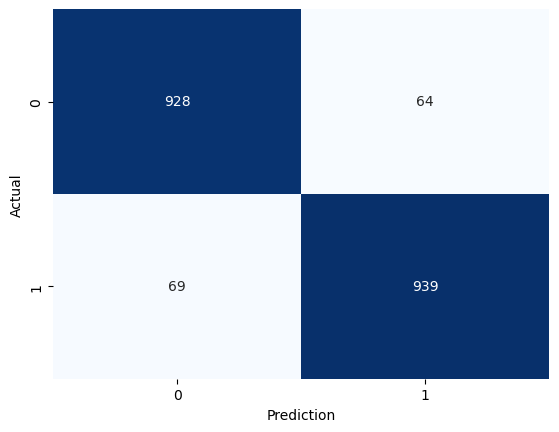

In [646]:
s = sns.heatmap(cf, annot=True, cmap='Blues', fmt='d', cbar=False)
s.set(xlabel='Prediction', ylabel='Actual')

In [647]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"acc : {acc}, recall : {recall}, ps : {ps}, f1 : {f1}")

acc : 0.9335, recall : 0.9315476190476191, ps : 0.9361914257228315, f1 : 0.9338637493784188


In [648]:
# 모델 튜닝

score = []

for k in range(3, 100):
    clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf = clf.fit(X_train, y_train)

    y_pred = knn_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"k : {k}, acc : {acc}")
    score.append(acc)

k : 3, acc : 0.9165
k : 4, acc : 0.917
k : 5, acc : 0.9255
k : 6, acc : 0.9225
k : 7, acc : 0.928
k : 8, acc : 0.926
k : 9, acc : 0.9275
k : 10, acc : 0.927
k : 11, acc : 0.9275
k : 12, acc : 0.929
k : 13, acc : 0.931
k : 14, acc : 0.9295
k : 15, acc : 0.9325
k : 16, acc : 0.931
k : 17, acc : 0.9305
k : 18, acc : 0.932
k : 19, acc : 0.933
k : 20, acc : 0.933
k : 21, acc : 0.9325
k : 22, acc : 0.932
k : 23, acc : 0.9325
k : 24, acc : 0.9335
k : 25, acc : 0.9335
k : 26, acc : 0.932
k : 27, acc : 0.9355
k : 28, acc : 0.935
k : 29, acc : 0.9355
k : 30, acc : 0.9355
k : 31, acc : 0.936
k : 32, acc : 0.936
k : 33, acc : 0.9345
k : 34, acc : 0.935
k : 35, acc : 0.936
k : 36, acc : 0.936
k : 37, acc : 0.936
k : 38, acc : 0.9365
k : 39, acc : 0.9365
k : 40, acc : 0.937
k : 41, acc : 0.9345
k : 42, acc : 0.936
k : 43, acc : 0.9355
k : 44, acc : 0.9365
k : 45, acc : 0.935
k : 46, acc : 0.9365
k : 47, acc : 0.934
k : 48, acc : 0.9335
k : 49, acc : 0.9325
k : 50, acc : 0.9325
k : 51, acc : 0.933
k 

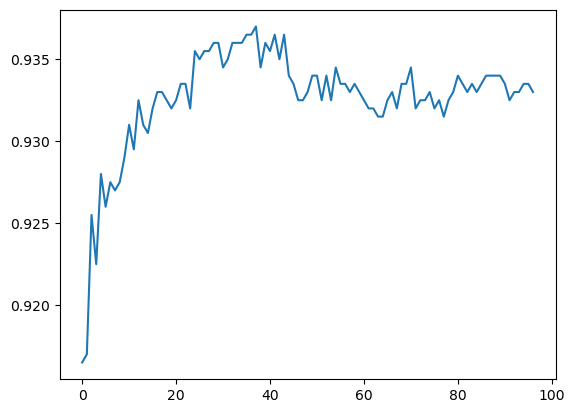

In [653]:
plt.plot(score)
plt.show()

In [654]:
# k가 40일때 best

best_clf = KNeighborsClassifier(n_neighbors=40)
best_clf = best_clf.fit(X_train, y_train)

In [660]:
best_pred = best_clf.predict(X_test)
best_acc = accuracy_score(y_test, best_pred)
best_acc

0.937